In [2]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
raw_dir = r'D:\GEU\Projects\15Drowsiness_Detection\dataset'
prepared_dir = r'D:\GEU\Projects\15Drowsiness_Detection\Prepared_dataset'
train_dir = os.path.join(prepared_dir, 'training')
valid_dir = os.path.join(prepared_dir, 'validation')

In [3]:
for directory in [train_dir, valid_dir]:
    os.makedirs(directory, exist_ok=True)

In [4]:
for dirpath, _, filenames in os.walk(raw_dir):
    for filename in filenames:
        if filename.endswith('.png'):
            label = filename.split('_')[4]
            src_path = os.path.join(dirpath, filename)
            dest_path = os.path.join(train_dir, 'closed_eyes' if label == '0' else 'open_eyes', filename)
            shutil.copy(src=src_path, dst=dest_path)

KeyboardInterrupt: 

In [1]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.5
)

NameError: name 'ImageDataGenerator' is not defined

In [5]:
valid_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.5
    )

In [6]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(80, 80),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

Found 42449 images belonging to 2 classes.


In [7]:
validation_data = valid_datagen.flow_from_directory(
    train_dir,
    target_size=(80, 80),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

Found 42449 images belonging to 2 classes.


In [8]:
base_model= InceptionV3(include_top=False,weights='imagenet',input_tensor=Input(shape=(80,80,3)))
head_model=base_model.output

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
checkpoint=ModelCheckpoint(r'D:\GEU\Projects\15Drowsiness_Detection\model_checkpoint\50-50.keras',monitor='val_loss',save_best_only=True,verbose=3)

earlystop=EarlyStopping(monitor='val_loss',patience=7,verbose=3,restore_best_weights=True)
learning_rate=ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=3)
callbacks=[checkpoint,earlystop,learning_rate]

In [10]:
head_model=Flatten()(head_model)
head_model=Dense(64,activation='relu')(head_model)
head_model=Dropout(0.5)(head_model)
head_model=Dense(2,activation='softmax')(head_model)

model=Model(inputs=base_model.input,outputs=head_model)

for layer in base_model.layers:
    layer.trainable=False

In [11]:
import PIL
from PIL import Image

In [12]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder

batch_size = 8

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(
    train_data,
    steps_per_epoch=len(train_data) // batch_size,
    validation_data=validation_data,  # Use validation data for evaluation during training
    validation_steps=len(validation_data) // batch_size,
    callbacks=callbacks,
    epochs=8
)

Epoch 1/8


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8742 - loss: 0.3222
Epoch 1: val_loss improved from inf to 0.19648, saving model to D:\GEU\Projects\15Drowsiness_Detection\model_checkpoint\50-50.keras
663/663 ━━━━━━━━━━━━━━━━━━━━ 138s 186ms/step - accuracy: 0.8742 - loss: 0.3221 - val_accuracy: 0.9248 - val_loss: 0.1965 - learning_rate: 0.0010
Epoch 2/8
663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9143 - loss: 0.2177
Epoch 2: val_loss improved from 0.19648 to 0.17400, saving model to D:\GEU\Projects\15Drowsiness_Detection\model_checkpoint\50-50.keras
663/663 ━━━━━━━━━━━━━━━━━━━━ 123s 186ms/step - accuracy: 0.9143 - loss: 0.2177 - val_accuracy: 0.9287 - val_loss: 0.1740 - learning_rate: 0.0010
Epoch 3/8
663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9176 - loss: 0.2096
Epoch 3: val_loss improved from 0.17400 to 0.16163, saving model to D:\GEU\Projects\15Drowsiness_Detection\model_checkpoint\50-50.keras
663/663 ━━━━━━━━━━━━━━━━━━━━ 2444s 4s/step - accuracy: 0.917

In [13]:
acc_tr,loss_tr=model.evaluate(train_data)
print(acc_tr)
print(loss_tr)

5307/5307 ━━━━━━━━━━━━━━━━━━━━ 545s 103ms/step - accuracy: 0.9396 - loss: 0.1548
0.1537410318851471
0.9394803047180176


In [14]:
acc_tr,loss_tr=model.evaluate(validation_data)
print(acc_tr)
print(loss_tr)

5307/5307 ━━━━━━━━━━━━━━━━━━━━ 505s 95ms/step - accuracy: 0.9387 - loss: 0.1533
0.1567557007074356
0.9371010065078735


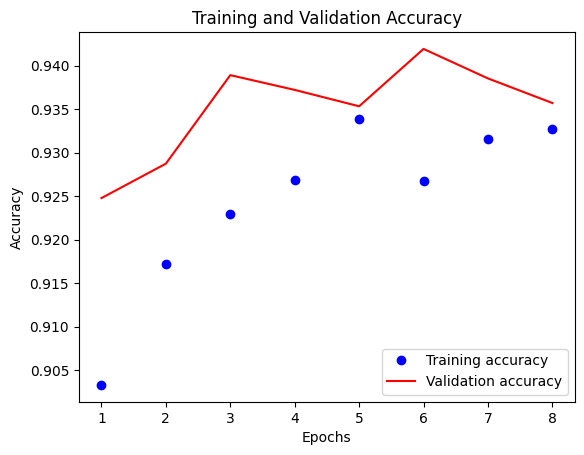

In [15]:
import matplotlib.pyplot as plt

# Accessing training and validation accuracy from history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting training and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Training Accuracy:", final_train_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

Final Training Accuracy: 0.932692289352417
Final Validation Accuracy: 0.9357088804244995
